# NOTE: change to SMTPLIB for emailing

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time
import psutil

from MonteCarlo.TwoAircraftEncounter.ScenarioMP_Sensitivity_Analysis import simulate_encounter

C:\Users\quekz\PycharmProjects\AAM_Sim


### Turn off warnings in Linux (AWS)... tqdm seems to have issues displaying correctly if there are many warnings. 

In [21]:
import warnings
import platform
if platform.system() == 'Linux':
    warnings.filterwarnings('ignore') # <---- hides warnings, makes tqdm work better.

In [22]:
Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param_Sensitivity_Analysis.csv')
data = pd.read_csv(Init_Param_Path)

num_of_runs_to_sim = 6

data['Combined_Spds'] = data['AC1_Cruise_Speed'] + data['AC2_Cruise_Speed']
data = data.sort_values('Combined_Spds', ascending=False)
data[['Run', 'Combined_Spds', 'AC1_Trk_Unit_Clk_Sync_Err']].head(5)

,Run,Combined_Spds,AC1_Trk_Unit_Clk_Sync_Err
79736,79736,39.904552,-0.001479
73328,73328,39.880069,-0.005705
81294,81294,39.874866,0.000065
75573,75573,39.867959,0.005810
31488,31488,39.841688,0.000601


In [23]:
data = data['Run'].head(num_of_runs_to_sim).unique()  # <--- Returns a list (technically, in this case it's a pd.Series instance)
data

array([79736, 73328, 81294, 75573, 31488, 37507], dtype=int64)

In [5]:
import multiprocessing as mp
from tqdm.notebook import tqdm
import psutil
from MonteCarlo.TwoAircraftEncounter.ScenarioMP_Sensitivity_Analysis import simulate_encounter

Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param_Sensitivity_Analysis.csv')
data = pd.read_csv(Init_Param_Path)

data = data['Run'].unique()[0:6]  # <--- Returns a list (technically, in this case it's a pd.Series instance)
# data = data['Run'].unique()

if __name__ == '__main__':
    start = time.time()
    with mp.Pool(processes = 3) as pool:
    # with mp.Pool(processes = psutil.cpu_count(logical=True)) as pool:
        results = list(tqdm(pool.imap(simulate_encounter, data), total = len(data)))
        pool.close()
        pool.join()
        results = pd.concat(results)
        end = time.time()
        
compute_time = end-start
simulated_flight_time_s = results['Total_Flight_Time'].sum()
speedup = simulated_flight_time_s/compute_time
print('Took %.3f seconds, simulated flight time is %.3f seconds, total speedup is %.3f times'%(end-start, 
                                                                                               simulated_flight_time_s, 
                                                                                               speedup))

results

  0%|          | 0/6 [00:00<?, ?it/s]

Took 102.777 seconds, simulated flight time is 906.692 seconds, total speedup is 8.822 times


,Run,AC1_Dist_to_Last_WPT,AC2_Dist_to_Last_WPT,AC1_EndState_Time,AC2_EndState_Time,Total_Flight_Time,GT_NC2_Start_Time,GT_NC2_End_Time,GT_NC2_Detected,GT_NC2_Rel_Hdg_(Actual_Rad),...,Worst_WC_Dist_15m_Start_Time,Worst_WC_Dist_15m_End_Time,Worst_WC_Dist_15m_Detected,Worst_WC_Dist_15m_Rel_Hdg_(Actual_Rad),Worst_WC_Dist_15m_Rel_Hdg_(Desired_Track_Rad),Worst_WC_Dist_15m_Rel_Vel_Hdg_(Actual_Rad),Worst_WC_Dist_15m_Rel_Hor_Dist,Worst_WC_Dist_15m_Rel_Hor_Dist_Delta,Worst_WC_Dist_15m_Rel_Vert_Dist,Worst_WC_Dist_15m_Rel_Vert_Dist_Delta
0,0,3.090500,3.390742,77.575000,75.500000,153.075000,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,5.157660,5.534228,75.375000,75.366667,150.741667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,3.080430,8.221563,75.041667,74.875000,149.916667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,10.627681,7.421887,72.666667,78.216667,150.883333,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,8.591971,2.493110,74.383333,75.266667,149.650000,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,5.674370,3.134083,76.258333,76.166667,152.425000,None,None,0,None,...,19.4625,23.254167,1,0.41948,0.485533,0.32016,17.425141,2.531493,-2.987649,1.803853


In [6]:
results.columns

Index(['Run', 'AC1_Dist_to_Last_WPT', 'AC2_Dist_to_Last_WPT',
       'AC1_EndState_Time', 'AC2_EndState_Time', 'Total_Flight_Time',
       'GT_NC2_Start_Time', 'GT_NC2_End_Time', 'GT_NC2_Detected',
       'GT_NC2_Rel_Hdg_(Actual_Rad)',
       ...
       'Worst_WC_Dist_15m_Start_Time', 'Worst_WC_Dist_15m_End_Time',
       'Worst_WC_Dist_15m_Detected', 'Worst_WC_Dist_15m_Rel_Hdg_(Actual_Rad)',
       'Worst_WC_Dist_15m_Rel_Hdg_(Desired_Track_Rad)',
       'Worst_WC_Dist_15m_Rel_Vel_Hdg_(Actual_Rad)',
       'Worst_WC_Dist_15m_Rel_Hor_Dist',
       'Worst_WC_Dist_15m_Rel_Hor_Dist_Delta',
       'Worst_WC_Dist_15m_Rel_Vert_Dist',
       'Worst_WC_Dist_15m_Rel_Vert_Dist_Delta'],
      dtype='object', length=426)

In [7]:
# fig, axs = plt.subplots(ncols=4, figsize=(16,5))

# axs[0].scatter(results['Run'], results['AC1_NSE_Radial_Error_Std'], label='AC1', color='b', alpha=0.5)
# axs[0].scatter(results['Run'], results['AC2_NSE_Radial_Error_Std'], label='AC2', color='orange', alpha=0.5)
# axs[0].set_title('Radial NSE STD')
# axs[0].legend()

# axs[1].scatter(results['Run'], results['AC1_NSE_Std_x'], label='AC1', color='b', alpha=0.5)
# axs[1].scatter(results['Run'], results['AC2_NSE_Std_x'], label='AC2', color='orange', alpha=0.5)
# axs[1].set_title('NSE STD - X')
# axs[1].legend()

# axs[2].scatter(results['Run'], results['AC1_NSE_Std_y'], label='AC1', color='b', alpha=0.5)
# axs[2].scatter(results['Run'], results['AC2_NSE_Std_y'], label='AC2', color='orange', alpha=0.5)
# axs[2].set_title('NSE STD - Y')
# axs[2].legend()

# axs[3].scatter(results['Run'], results['AC1_NSE_Std_z'], label='AC1', color='b', alpha=0.5)
# axs[3].scatter(results['Run'], results['AC2_NSE_Std_z'], label='AC2', color='orange', alpha=0.5)
# axs[3].set_title('NSE STD - Z')
# axs[3].legend()

# plt.show()

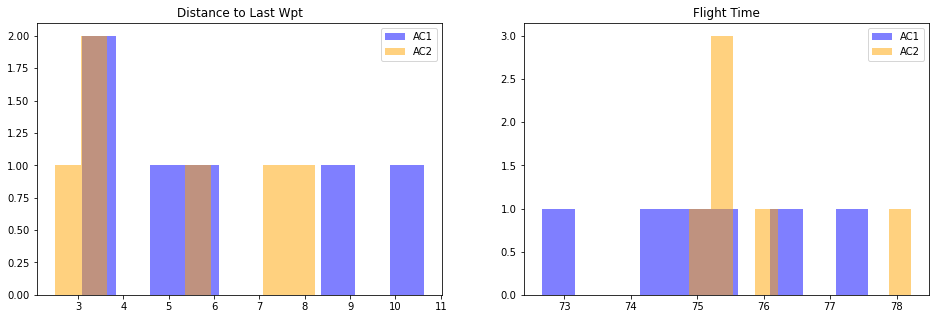

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

axs[0].hist(results['AC1_Dist_to_Last_WPT'], color='b', alpha=0.5, label = 'AC1')
axs[0].hist(results['AC2_Dist_to_Last_WPT'], color='orange', alpha=0.5, label = 'AC2')
axs[0].set_title('Distance to Last Wpt')
axs[0].legend()

axs[1].hist(results['AC1_EndState_Time'], color='b', alpha=0.5, label = 'AC1')
axs[1].hist(results['AC2_EndState_Time'], color='orange', alpha=0.5, label = 'AC2')
axs[1].set_title('Flight Time')
axs[1].legend()

plt.show()

In [9]:
# Results_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Results_Tracking_Sensitivity_Analysis.csv')

# results.to_csv(Results_Path)

In [10]:
results

,Run,AC1_Dist_to_Last_WPT,AC2_Dist_to_Last_WPT,AC1_EndState_Time,AC2_EndState_Time,Total_Flight_Time,GT_NC2_Start_Time,GT_NC2_End_Time,GT_NC2_Detected,GT_NC2_Rel_Hdg_(Actual_Rad),...,Worst_WC_Dist_15m_Start_Time,Worst_WC_Dist_15m_End_Time,Worst_WC_Dist_15m_Detected,Worst_WC_Dist_15m_Rel_Hdg_(Actual_Rad),Worst_WC_Dist_15m_Rel_Hdg_(Desired_Track_Rad),Worst_WC_Dist_15m_Rel_Vel_Hdg_(Actual_Rad),Worst_WC_Dist_15m_Rel_Hor_Dist,Worst_WC_Dist_15m_Rel_Hor_Dist_Delta,Worst_WC_Dist_15m_Rel_Vert_Dist,Worst_WC_Dist_15m_Rel_Vert_Dist_Delta
0,0,3.090500,3.390742,77.575000,75.500000,153.075000,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,5.157660,5.534228,75.375000,75.366667,150.741667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,3.080430,8.221563,75.041667,74.875000,149.916667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,10.627681,7.421887,72.666667,78.216667,150.883333,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,8.591971,2.493110,74.383333,75.266667,149.650000,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,5.674370,3.134083,76.258333,76.166667,152.425000,None,None,0,None,...,19.4625,23.254167,1,0.41948,0.485533,0.32016,17.425141,2.531493,-2.987649,1.803853


In [11]:
def keyword_list_filter(l, *keys):
    if len(keys) > 1:
        # print(keys[0])
        l_filtered = list(filter(lambda x: keys[0] in x, l))
        # print('l_filtered', l_filtered, 'keys[1:]', *keys[1:])
        return keyword_list_filter(l_filtered, *keys[1:])
    else:
        # print(keys[0])
        return list(filter(lambda x: keys[0] in x, l))
    
def keyword_list_exclude(l, *keys):
    if len(keys) > 1:
        l_filtered = list(filter(lambda x: keys[0] not in x, l))
        return keyword_list_exclude(l_filtered, *keys[1:])
    else:
        return list(filter(lambda x: keys[0] not in x, l))

def filter_column_names(df, *keys):
    cols = df.columns
    return keyword_list_filter(cols, *keys)

In [12]:
keyword_list_filter(results.columns, 'NC', 'GT', 'Start')

['GT_NC2_Start_Time']

In [13]:
keyword_list_filter(results.columns, 'NC', 'GT')

['GT_NC2_Start_Time',
 'GT_NC2_End_Time',
 'GT_NC2_Detected',
 'GT_NC2_Rel_Hdg_(Actual_Rad)',
 'GT_NC2_Rel_Hdg_(Desired_Track_Rad)',
 'GT_NC2_Rel_Vel_Hdg_(Actual_Rad)',
 'GT_NC2_Rel_Hor_Dist',
 'GT_NC2_Rel_Hor_Dist_Delta',
 'GT_NC2_Rel_Vert_Dist',
 'GT_NC2_Rel_Vert_Dist_Delta']

In [14]:
a = keyword_list_filter(results.columns, 'WC', 'Start_Time')
a

# results[keyword_list_filter(results.columns, 'WC', 'Start_Time')]

['GT_WC_Dist_15m_Start_Time',
 'A99_WC_Dist_15m_Start_Time',
 'A95_WC_Dist_15m_Start_Time',
 'A90_WC_Dist_15m_Start_Time',
 'A85_WC_Dist_15m_Start_Time',
 'A80_WC_Dist_15m_Start_Time',
 'UR0.2_WC_Dist_15m_Start_Time',
 'UR0.33_WC_Dist_15m_Start_Time',
 'UR1_WC_Dist_15m_Start_Time',
 'UR2_WC_Dist_15m_Start_Time',
 'UR5_WC_Dist_15m_Start_Time',
 'UR10_WC_Dist_15m_Start_Time',
 'L0.1_WC_Dist_15m_Start_Time',
 'L0.2_WC_Dist_15m_Start_Time',
 'L0.3_WC_Dist_15m_Start_Time',
 'L0.5_WC_Dist_15m_Start_Time',
 'L0.7_WC_Dist_15m_Start_Time',
 'L1_WC_Dist_15m_Start_Time',
 'Best_WC_Dist_15m_Start_Time',
 'Realistic_WC_Dist_15m_Start_Time',
 'Worst_WC_Dist_15m_Start_Time']

In [15]:
a.append('GT_NC2_Start_Time')
a

['GT_WC_Dist_15m_Start_Time',
 'A99_WC_Dist_15m_Start_Time',
 'A95_WC_Dist_15m_Start_Time',
 'A90_WC_Dist_15m_Start_Time',
 'A85_WC_Dist_15m_Start_Time',
 'A80_WC_Dist_15m_Start_Time',
 'UR0.2_WC_Dist_15m_Start_Time',
 'UR0.33_WC_Dist_15m_Start_Time',
 'UR1_WC_Dist_15m_Start_Time',
 'UR2_WC_Dist_15m_Start_Time',
 'UR5_WC_Dist_15m_Start_Time',
 'UR10_WC_Dist_15m_Start_Time',
 'L0.1_WC_Dist_15m_Start_Time',
 'L0.2_WC_Dist_15m_Start_Time',
 'L0.3_WC_Dist_15m_Start_Time',
 'L0.5_WC_Dist_15m_Start_Time',
 'L0.7_WC_Dist_15m_Start_Time',
 'L1_WC_Dist_15m_Start_Time',
 'Best_WC_Dist_15m_Start_Time',
 'Realistic_WC_Dist_15m_Start_Time',
 'Worst_WC_Dist_15m_Start_Time',
 'GT_NC2_Start_Time']

In [16]:
results[a]

,GT_WC_Dist_15m_Start_Time,A99_WC_Dist_15m_Start_Time,A95_WC_Dist_15m_Start_Time,A90_WC_Dist_15m_Start_Time,A85_WC_Dist_15m_Start_Time,A80_WC_Dist_15m_Start_Time,UR0.2_WC_Dist_15m_Start_Time,UR0.33_WC_Dist_15m_Start_Time,UR1_WC_Dist_15m_Start_Time,UR2_WC_Dist_15m_Start_Time,...,L0.1_WC_Dist_15m_Start_Time,L0.2_WC_Dist_15m_Start_Time,L0.3_WC_Dist_15m_Start_Time,L0.5_WC_Dist_15m_Start_Time,L0.7_WC_Dist_15m_Start_Time,L1_WC_Dist_15m_Start_Time,Best_WC_Dist_15m_Start_Time,Realistic_WC_Dist_15m_Start_Time,Worst_WC_Dist_15m_Start_Time,GT_NC2_Start_Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
0,19.879167,20.670833,20.7125,20.7125,20.7125,20.629167,21.379167,21.254167,20.670833,20.670833,...,20.629167,20.670833,20.754167,20.795833,20.920833,21.045833,20.629167,20.754167,19.4625,None


In [17]:
keyword_list_filter(results.columns, '15', 'GT', 'Delta', 'Hor')

['GT_WC_Dist_15m_Rel_Hor_Dist_Delta']

In [18]:
results[['L0.1_WC_Dist_15m_Rel_Vert_Dist_Delta',
         'L0.2_WC_Dist_15m_Rel_Vert_Dist_Delta',
         'L0.3_WC_Dist_15m_Rel_Vert_Dist_Delta',
         'L0.5_WC_Dist_15m_Rel_Vert_Dist_Delta', 
         'L0.7_WC_Dist_15m_Rel_Vert_Dist_Delta',
         'L1_WC_Dist_15m_Rel_Vert_Dist_Delta', 
         'GT_WC_Dist_15m_Rel_Vert_Dist_Delta'
        ]]

,L0.1_WC_Dist_15m_Rel_Vert_Dist_Delta,L0.2_WC_Dist_15m_Rel_Vert_Dist_Delta,L0.3_WC_Dist_15m_Rel_Vert_Dist_Delta,L0.5_WC_Dist_15m_Rel_Vert_Dist_Delta,L0.7_WC_Dist_15m_Rel_Vert_Dist_Delta,L1_WC_Dist_15m_Rel_Vert_Dist_Delta,GT_WC_Dist_15m_Rel_Vert_Dist_Delta
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.936632,1.535573,1.456045,1.633126,1.304441,1.569283,0.0


In [19]:
results[['L0.1_WC_Dist_15m_Rel_Hor_Dist_Delta',
         'L0.2_WC_Dist_15m_Rel_Hor_Dist_Delta',
         'L0.3_WC_Dist_15m_Rel_Hor_Dist_Delta',
         'L0.5_WC_Dist_15m_Rel_Hor_Dist_Delta', 
         'L0.7_WC_Dist_15m_Rel_Hor_Dist_Delta',
         'L1_WC_Dist_15m_Rel_Hor_Dist_Delta', 
         'GT_WC_Dist_15m_Rel_Hor_Dist_Delta'
        ]]

,L0.1_WC_Dist_15m_Rel_Hor_Dist_Delta,L0.2_WC_Dist_15m_Rel_Hor_Dist_Delta,L0.3_WC_Dist_15m_Rel_Hor_Dist_Delta,L0.5_WC_Dist_15m_Rel_Hor_Dist_Delta,L0.7_WC_Dist_15m_Rel_Hor_Dist_Delta,L1_WC_Dist_15m_Rel_Hor_Dist_Delta,GT_WC_Dist_15m_Rel_Hor_Dist_Delta
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-4.794923,-4.981059,-5.439862,-5.639243,-4.830439,-6.970996,0.0


In [ ]:
import smtplib, ssl

email_address = 'tmuas2022@gmail.com'     # add email address here
Subject = 'Subject: Monte Carlo Results \n\n'
content = ' Dear Sith Lord, \n Your simulation results beckon.\n\n ' 
footer = 'Your Droid Army (AWS)'    # add test footer 
passcode = 'zupmvqlgtwkjyjxl'        # add passcode here
conn = smtplib.SMTP_SSL('smtp.gmail.com', 465) 
conn.ehlo()
conn.login(email_address, passcode)
conn.sendmail(email_address,
              'zhihao.quek16@sps.nus.edu.sg',
              Subject + content + footer)
conn.quit()